# Quantum teleportation

## Generate random state for message qubit
This qubit, initially posessed by Alice, will be teleported to Bob

(0.24137758673257897, 0.970431275579655)


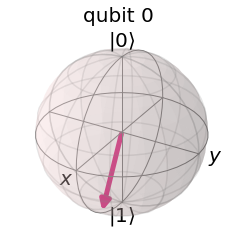

In [1]:
import random, math
from qiskit.visualization import plot_bloch_multivector

# very simple implementation - without complex parts
def get_random_state():
    probX = random.random()
    probY = 1 - probX
    return math.sqrt(probX), math.sqrt(probY)

msg_state = get_random_state()
print(msg_state)
plot_bloch_multivector(msg_state)

## Create teleportation circuit

1. 3 qubits and 2 classical bits
2. Alice entangles 2 qubits, 1 is sent over to Bob
3. Alice interacts her 2 qubits and measures results
4. Classical bits sent to Bob
5. Bob updates his qubit based on  classical bits and measures result

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def create_circuit(msg_state):
    alice = QuantumRegister(1, name="alice")
    bob = QuantumRegister(1, name="bob")
    msg = QuantumRegister(1, name="msg")
    cbitX = ClassicalRegister(1, name="cbitX")
    cbitZ = ClassicalRegister(1, name="cbitZ")
    qc = QuantumCircuit(msg, alice, bob, cbitX, cbitZ)

    # msg init
    qc.initialize(msg_state, msg)
    qc.barrier()

    # alice init
    qc.h(alice)
    qc.cx(alice, bob)
    qc.barrier()

    # alice prepare
    qc.cx(msg, alice)
    qc.h(msg)
    qc.barrier()

    # alice measure
    qc.measure(msg, cbitX)
    qc.measure(alice, cbitZ)
    qc.barrier()

    # bob measure
    qc.x(bob).c_if(cbitX, 1)
    qc.z(bob).c_if(cbitZ, 1)
    return qc

qc = create_circuit(msg_state)
qc.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐    ░ »
  msg_0: ┤ initialize(0.24138,0.97043) ├─░────────────░───■──┤ H ├─░─┤M├────░─»
         └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ »
alice_0: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─»
                                         ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ »
  bob_0: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                         ░      └───┘ ░            ░  ║  ║  ░ »
cbitX_0: ═════════════════════════════════════════════════════════════╩══╬════»
                                                                         ║    »
cbitZ_0: ════════════════════════════════════════════════════════════════╩════»
                                                                              »
«                       
«  msg_0: ──────────────
«                       
«alice_0: ──────────────
«          ┌───┐  ┌───┐ 
«  bob_0: ─┤ X ├──┤ Z ├─
«          └─┬─┘  └─┬─┘ 
«         ┌──┴──┐   │   
«cbitX_0: ╡ = 1 ╞═══╪═══
«         └─────┘┌──┴──┐
«cbitZ_0: ═══════╡ = 1 ╞
«                └─────┘

## Simulate teleportation

[0.24137759+0.00000000e+00j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j
 0.97043128-1.18843556e-16j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j]


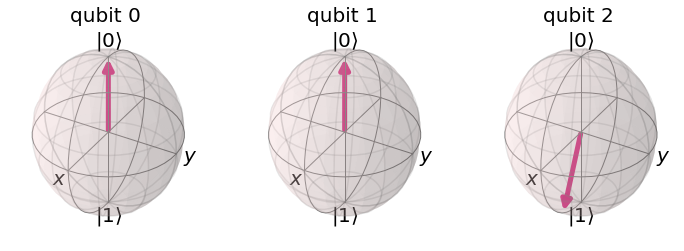

In [3]:
from qiskit import execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector

backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
print(out_vector)
plot_bloch_multivector(out_vector)

## Additional resources

1. https://qiskit.org/textbook/ch-algorithms/teleportation.html
2. https://algassert.com/quirk#circuit={%22cols%22:[[1,%22H%22],[1,%22%E2%80%A2%22,1,1,%22X%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,1,1,%22%E2%80%A6%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,1,1,%22%E2%80%A6%22],[%22~87lj%22],[%22Bloch%22],[%22%E2%80%A2%22,%22X%22],[%22H%22],[%22Measure%22,%22Measure%22],[1,%22%E2%80%A2%22,1,1,%22X%22],[%22%E2%80%A2%22,1,1,1,%22Z%22],[1,1,1,1,%22Bloch%22],[1,1,1,1,%22~f7c0%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}